In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [9]:
df = pd.read_csv("SaudiHSResults_Balanced.csv",header=0)


models = [
       'arabert_mapped',
       'allam_zero_shot', 'allam_one_shot', 'allam_three_shot', 'gemma_0shot',
       'gemma_1shot', 'gemma_3shot', 'gpt4o_zero_shot', 'gpt4o_one_shot',
       'gpt4o_few_shot', 'llama_0shot', 'llama_1shot', 'llama_3shot'
]


In [10]:
# normalizing labels off to offensive
df['label'] = df['label'].str.strip().str.lower()
df = df.map(lambda x: "offensive" if isinstance(x, str) and x.strip().lower() == "off"   else x)
df["gpt4o_zero_shot"] = df["gpt4o_zero_shot"].str.strip().str.lower().replace("'off", "offensive")


In [10]:
#One emoji-only tweet was excluded from evaluation due to inability of AraBERT to classify non-text content
df = df.drop(index=572).reset_index(drop=True)


===== Evaluation for allam_zero_shot =====
              precision    recall  f1-score   support

         not       0.69      0.92      0.79       800
   offensive       0.88      0.59      0.71       800

    accuracy                           0.76      1600
   macro avg       0.79      0.76      0.75      1600
weighted avg       0.79      0.76      0.75      1600



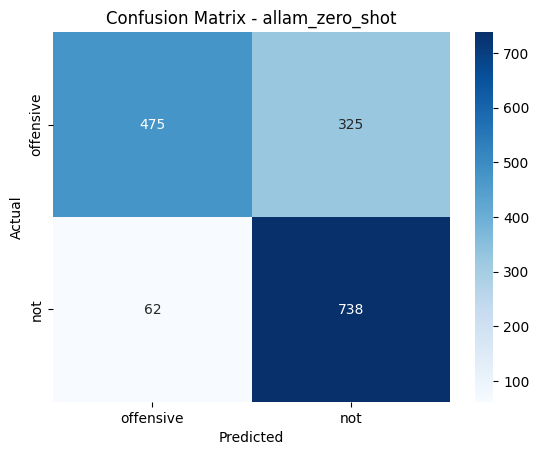


===== Evaluation for allam_one_shot =====
              precision    recall  f1-score   support

         not       0.92      0.62      0.74       800
   offensive       0.71      0.95      0.81       800

    accuracy                           0.78      1600
   macro avg       0.82      0.78      0.78      1600
weighted avg       0.82      0.78      0.78      1600



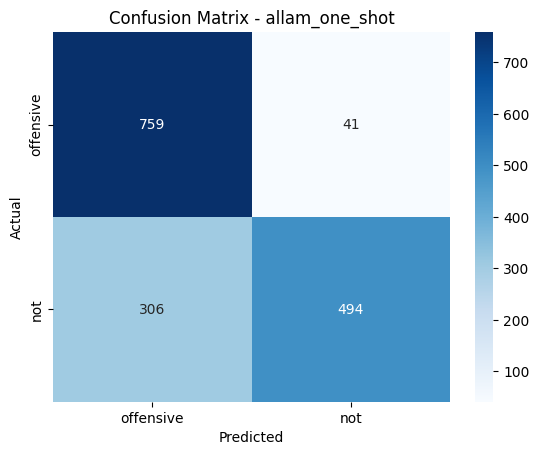


===== Evaluation for allam_three_shot =====
              precision    recall  f1-score   support

         not       0.85      0.76      0.80       800
   offensive       0.79      0.87      0.82       800

    accuracy                           0.81      1600
   macro avg       0.82      0.81      0.81      1600
weighted avg       0.82      0.81      0.81      1600



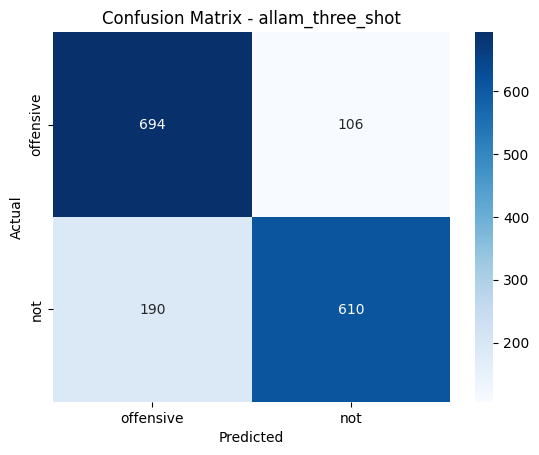


===== Evaluation for gemma_0shot =====
              precision    recall  f1-score   support

         not       0.91      0.64      0.75       800
   offensive       0.72      0.94      0.82       800

    accuracy                           0.79      1600
   macro avg       0.82      0.79      0.78      1600
weighted avg       0.82      0.79      0.78      1600



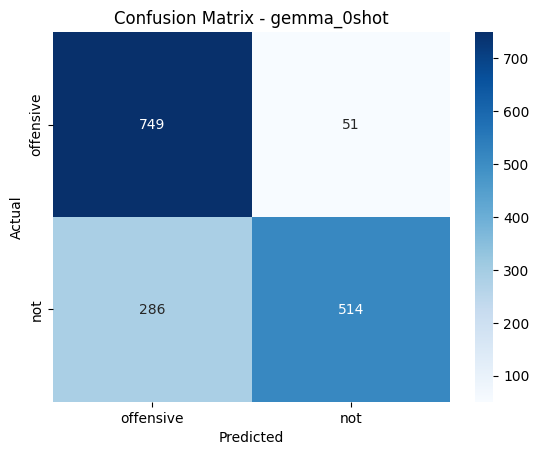


===== Evaluation for gemma_1shot =====
              precision    recall  f1-score   support

         not       0.91      0.67      0.77       800
   offensive       0.74      0.93      0.82       800

    accuracy                           0.80      1600
   macro avg       0.82      0.80      0.80      1600
weighted avg       0.82      0.80      0.80      1600



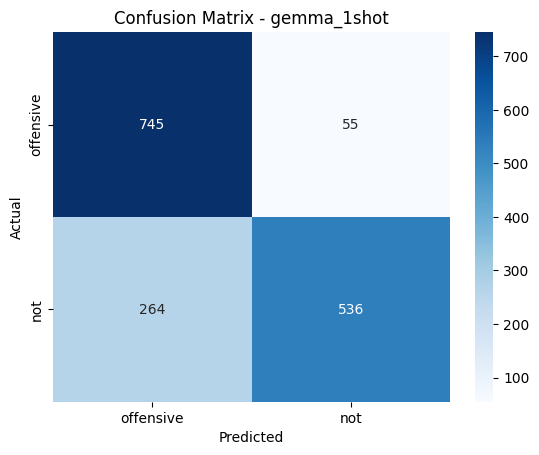


===== Evaluation for gemma_3shot =====
              precision    recall  f1-score   support

         not       0.89      0.73      0.80       800
   offensive       0.77      0.91      0.83       800

    accuracy                           0.82      1600
   macro avg       0.83      0.82      0.82      1600
weighted avg       0.83      0.82      0.82      1600



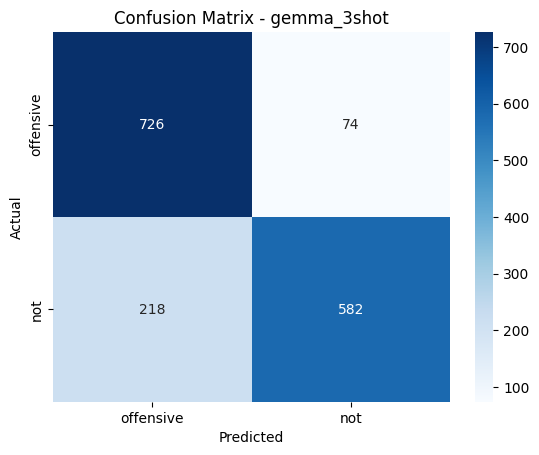


===== Evaluation for gpt4o_zero_shot =====
              precision    recall  f1-score   support

         not       0.81      0.88      0.84       800
   offensive       0.86      0.79      0.83       800

    accuracy                           0.83      1600
   macro avg       0.84      0.83      0.83      1600
weighted avg       0.84      0.83      0.83      1600



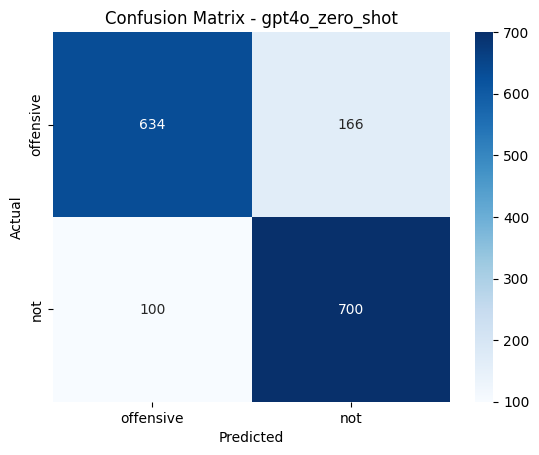


===== Evaluation for gpt4o_one_shot =====
              precision    recall  f1-score   support

         not       0.95      0.74      0.83       800
   offensive       0.79      0.96      0.87       800

    accuracy                           0.85      1600
   macro avg       0.87      0.85      0.85      1600
weighted avg       0.87      0.85      0.85      1600



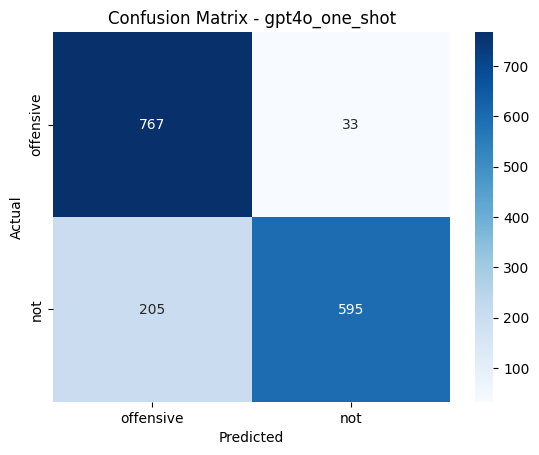


===== Evaluation for gpt4o_few_shot =====
              precision    recall  f1-score   support

         not       0.89      0.82      0.86       800
   offensive       0.84      0.90      0.87       800

    accuracy                           0.86      1600
   macro avg       0.87      0.86      0.86      1600
weighted avg       0.87      0.86      0.86      1600



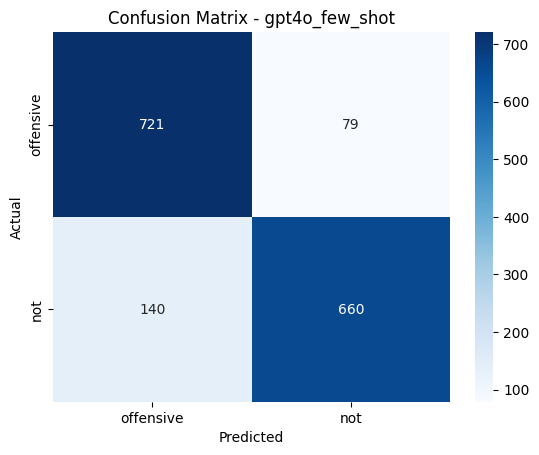


===== Evaluation for llama_0shot =====
              precision    recall  f1-score   support

         not       0.74      0.88      0.80       800
   offensive       0.85      0.70      0.77       800

    accuracy                           0.79      1600
   macro avg       0.80      0.79      0.79      1600
weighted avg       0.80      0.79      0.79      1600



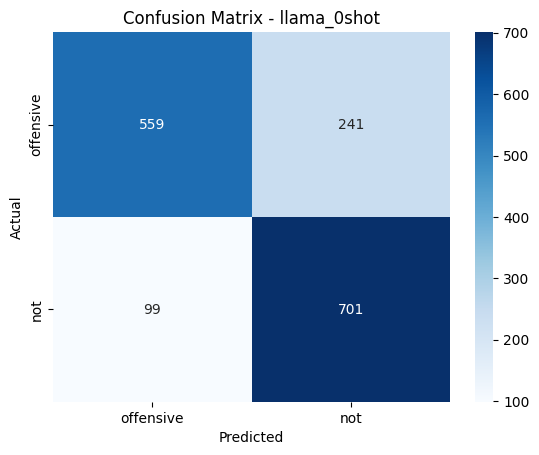


===== Evaluation for llama_1shot =====
              precision    recall  f1-score   support

         not       0.87      0.76      0.81       800
   offensive       0.79      0.89      0.83       800

    accuracy                           0.82      1600
   macro avg       0.83      0.82      0.82      1600
weighted avg       0.83      0.82      0.82      1600



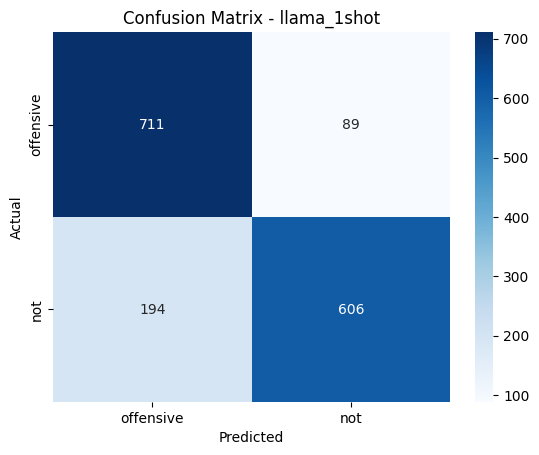


===== Evaluation for llama_3shot =====
              precision    recall  f1-score   support

         not       0.87      0.79      0.83       800
   offensive       0.81      0.88      0.84       800

    accuracy                           0.83      1600
   macro avg       0.84      0.83      0.83      1600
weighted avg       0.84      0.83      0.83      1600



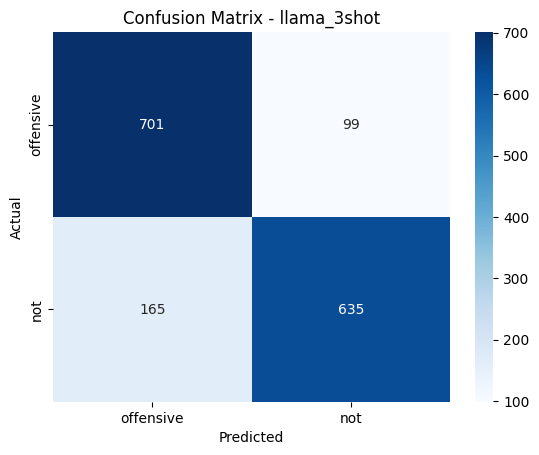

In [16]:

def evaluate_model(true_labels, predicted_labels, model_name):
    print(f"\n===== Evaluation for {model_name} =====")
    print(classification_report(true_labels, predicted_labels))

    cm = confusion_matrix(true_labels, predicted_labels, labels=["offensive", "not"])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["offensive", "not"], yticklabels=["offensive", "not"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


for model in models:
    if model in df.columns:
        evaluate_model(df['label'], df[model], model)

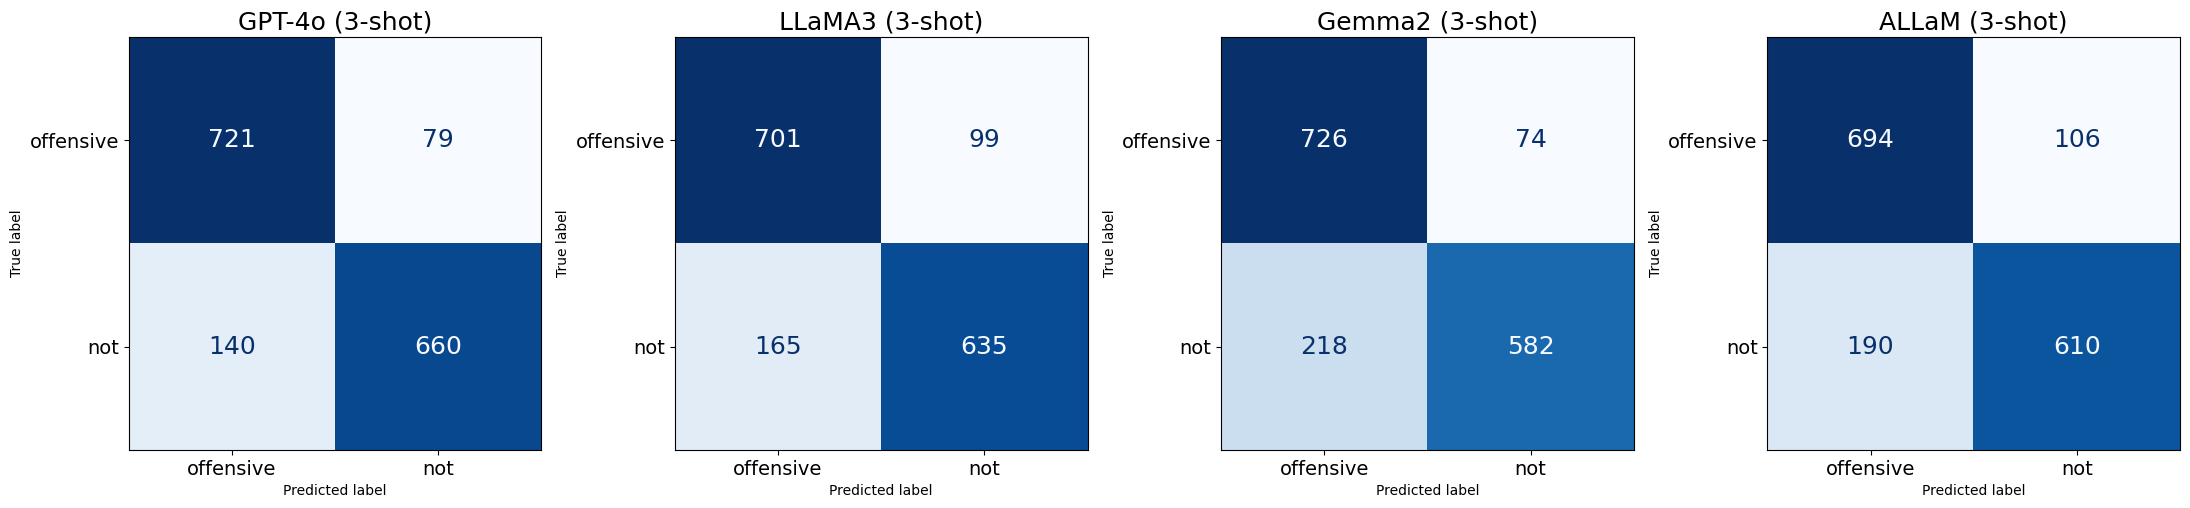

In [11]:

fig, axes = plt.subplots(1, 4, figsize=(22, 6))

models = {
    "GPT-4o": df["gpt4o_few_shot"],
    "LLaMA3": df["llama_3shot"],
    "Gemma2": df["gemma_3shot"],
    "ALLaM": df["allam_three_shot"]
}

for ax, (name, preds) in zip(axes.flat, models.items()):
    cm = confusion_matrix(df['label'], preds, labels=["offensive", "not"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["offensive", "not"])
    disp.plot(
        ax=ax,
        cmap='Blues',
        colorbar=False,
        values_format='d'
    )
    ax.set_title(f"{name} (3-shot)", fontsize=18)
    ax.tick_params(axis='both', labelsize=14)


    for text in disp.text_.ravel():
        text.set_fontsize(18)

plt.tight_layout()
plt.savefig("confusion_matrices_fewshot.png", dpi=300)
plt.show()


In [9]:
true_labels_column = df['arabert_mapped']  # check for NaN in arabert
non_string_values = true_labels_column[~true_labels_column.apply(lambda x: isinstance(x, str))]

print("Non-string values:")
print(non_string_values)

Non-string values:
572    NaN
Name: arabert_mapped, dtype: object



# Miscalssified Tweet Analyis



In [ ]:
import pandas as pd


# List of model prediction columns
models = ['gpt4o_few_shot', 'llama_3shot', 'allam_three_shot', 'gemma_3shot']

# Number of samples per model
sample_count = 15

samples = []

def guess_error_type(row):
    if row['label'] == 'offensive' and row['predicted'] == 'not':
        return 'False Negative'
    elif row['label'] == 'not' and row['predicted'] == 'offensive':
        return 'False Positive'
    else:
        return 'Other'


for model in models:
    misclassified = df[df[model] != df['label']]
    sampled = misclassified[['tweet', 'label', model]].sample(n=sample_count, random_state=42)
    sampled['model'] = model
    sampled = sampled.rename(columns={model: 'predicted'})
    sampled['error_type'] = sampled.apply(guess_error_type, axis=1)
    sampled['notes'] = ''



    samples.append(sampled)


misclassified_samples = pd.concat(samples, ignore_index=True)


misclassified_samples.to_csv("misclassified_samples.csv", index=False)




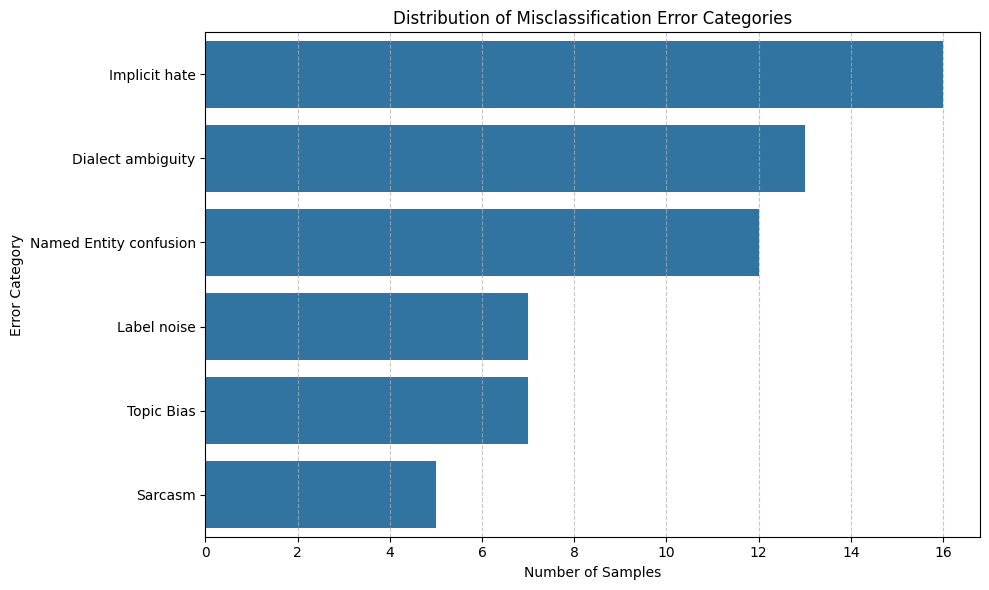

In [24]:
import seaborn as sns


file_path = "misclassified_samples.csv"
df = pd.read_csv(file_path)

error_counts = df['notes'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=error_counts.values, y=error_counts.index)
plt.title("Distribution of Misclassification Error Categories")
plt.xlabel("Number of Samples")
plt.ylabel("Error Category")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipython-input-31-384143764.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


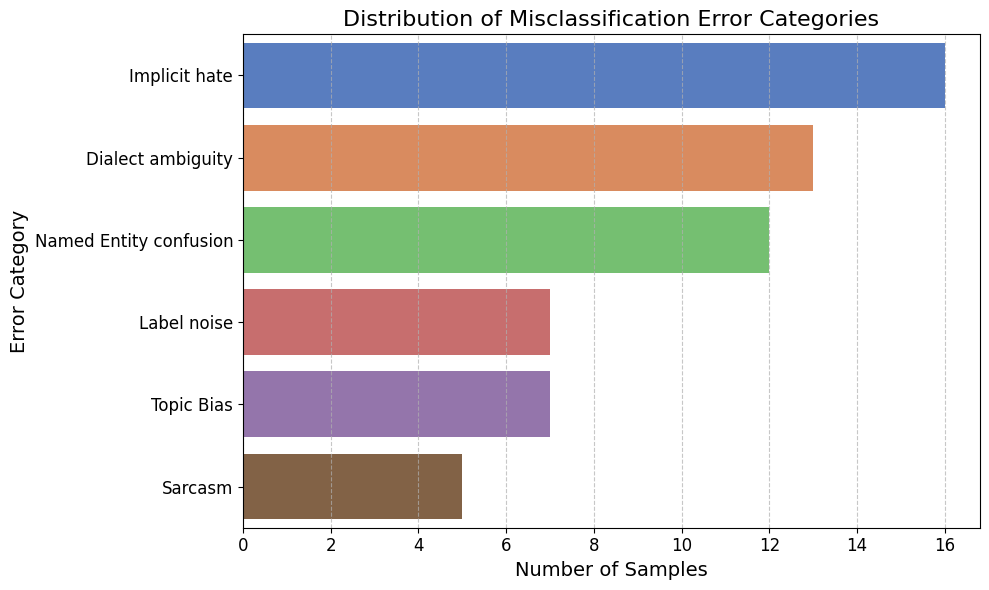

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


file_path = "misclassified_samples.csv"
df = pd.read_csv(file_path)


error_counts = df['notes'].value_counts()

palette = sns.color_palette("muted", n_colors=len(error_counts))

plt.figure(figsize=(10, 6))
sns.barplot(
    x=error_counts.values,
    y=error_counts.index,
    palette=palette
)


plt.title("Distribution of Misclassification Error Categories", fontsize=16)
plt.xlabel("Number of Samples", fontsize=14)
plt.ylabel("Error Category", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
